## Expt.-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors
### Tanvi Santosh Patil Roll No:53

In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [59]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

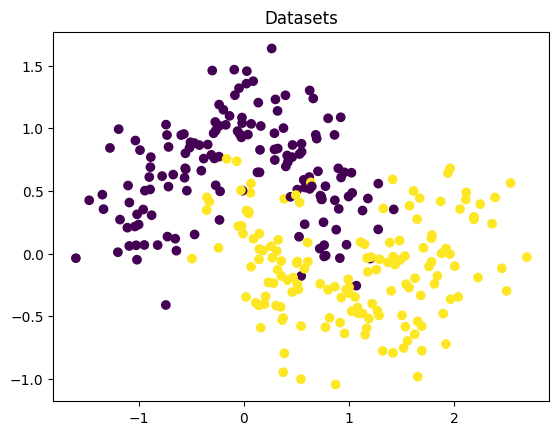

In [60]:
x, y = make_moons(n_samples=300,noise=0.25,random_state=42)

plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Datasets")
plt.show()

In [61]:
x_train, x_test,y_train,y_test =train_test_split(
    x,y,test_size= 0.3, random_state=0
)

In [62]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [63]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train,y_train)

y_pred_lr = lr.predict(x_test_scaled)
print("Logistic Regression")
print("Accuracy :", accuracy_score (y_test, y_pred_lr))
print("Confusion Matrices: \n",confusion_matrix(y_test, y_pred_lr))

Logistic Regression
Accuracy : 0.8888888888888888
Confusion Matrices: 
 [[34  5]
 [ 5 46]]


In [64]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test,y_pred_dt))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_dt))

Decision Tree
Accuracy: 0.8555555555555555
Confusion Matrix:
 [[30  9]
 [ 4 47]]


In [65]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scaled,y_train)

y_pred_knn = knn.predict(x_test_scaled)
print("KNN")
print("Accuracy:", accuracy_score(y_test,y_pred_knn))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_knn))

def plot_boundary(model,scaled,title):
  h=0.02
  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() +1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() +1

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))
  grid = np.c_[xx.ravel(),yy.ravel()]
  if scaled:
    grid = scaler.transform(grid)
  Z = model.predict(grid)
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,alpha=0.3)
  plt.scatter(x[:,0],x[:,1],c=y)
  plt.title(title)
  plt.show()


KNN
Accuracy: 0.9111111111111111
Confusion Matrix:
 [[38  1]
 [ 7 44]]


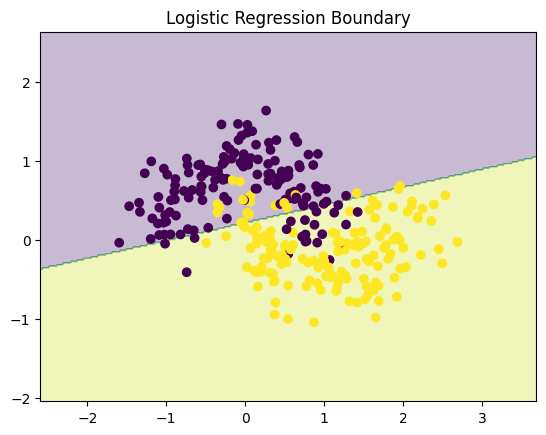

In [66]:
plot_boundary(lr,True,"Logistic Regression Boundary")

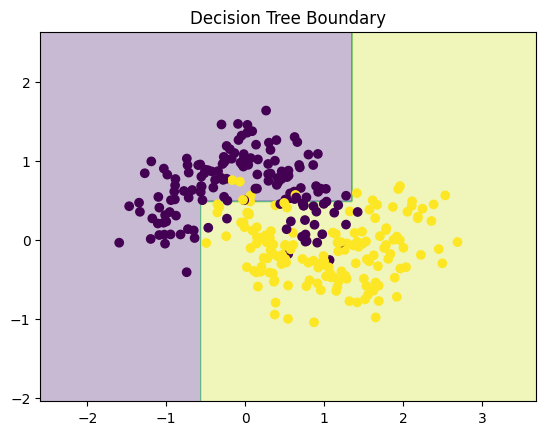

In [67]:
plot_boundary(dt,False,"Decision Tree Boundary")

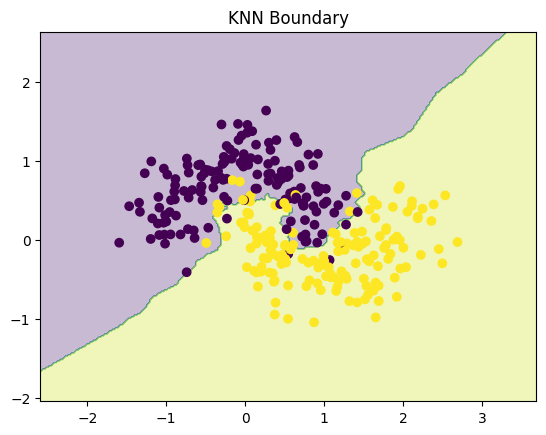

In [69]:
plot_boundary(knn,True,"KNN Boundary")
 